In [1]:
import yfinance as yf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Example: Choose a stock

In [2]:
msft = yf.Ticker("MSFT")  # Microsoft
hist = msft.history(period="1y")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-08-08,134.94,137.30,134.28,137.20,27496500,0.00,0
2019-08-09,136.93,137.69,134.80,136.04,23466700,0.00,0
2019-08-12,135.40,136.18,133.60,134.14,20476600,0.00,0
2019-08-13,134.40,137.11,133.36,136.92,25154600,0.00,0
2019-08-14,135.15,135.71,132.48,132.79,32527300,0.46,0
...,...,...,...,...,...,...,...
2020-08-03,211.52,217.64,210.44,216.54,78983000,0.00,0
2020-08-04,214.17,214.77,210.31,213.29,49280100,0.00,0
2020-08-05,214.90,215.00,211.57,212.94,28858600,0.00,0


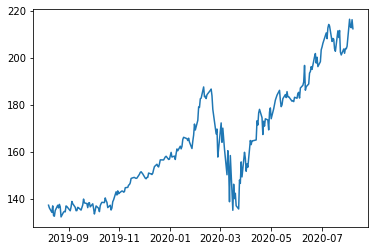

In [3]:
plt.plot(hist.index, hist["Close"])

# Simple Moving Averages & Exponential Moving Averages

\begin{equation*}
CurrentSMA = \frac{\sum_{days}}{days}
\end{equation*}

\begin{equation*}
CurrentEMA = ((Price(current) - PreviousEMA) * Multiplier) + PreviousEMA
\end{equation*}
Multiplier = 2/(1+N), 
where N = the number of days.

In [4]:
# 10 days SMA and EMA
DAYS = 10
hist["SMA"] = hist["Close"].rolling(DAYS).sum()/DAYS
hist["EMA"] = hist["Close"].ewm(span=DAYS, min_periods=0, adjust=False, ignore_na=False).mean()
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA,EMA
Date,,,,,,,,,
2019-08-08,134.94,137.30,134.28,137.20,27496500,0.00,0,NaN,137.200000
2019-08-09,136.93,137.69,134.80,136.04,23466700,0.00,0,NaN,136.989091
2019-08-12,135.40,136.18,133.60,134.14,20476600,0.00,0,NaN,136.471074
2019-08-13,134.40,137.11,133.36,136.92,25154600,0.00,0,NaN,136.552697
2019-08-14,135.15,135.71,132.48,132.79,32527300,0.46,0,NaN,135.868570
...,...,...,...,...,...,...,...,...,...
2020-08-03,211.52,217.64,210.44,216.54,78983000,0.00,0,205.972,206.919446
2020-08-04,214.17,214.77,210.31,213.29,49280100,0.00,0,206.426,208.077728
2020-08-05,214.90,215.00,211.57,212.94,28858600,0.00,0,206.545,208.961778


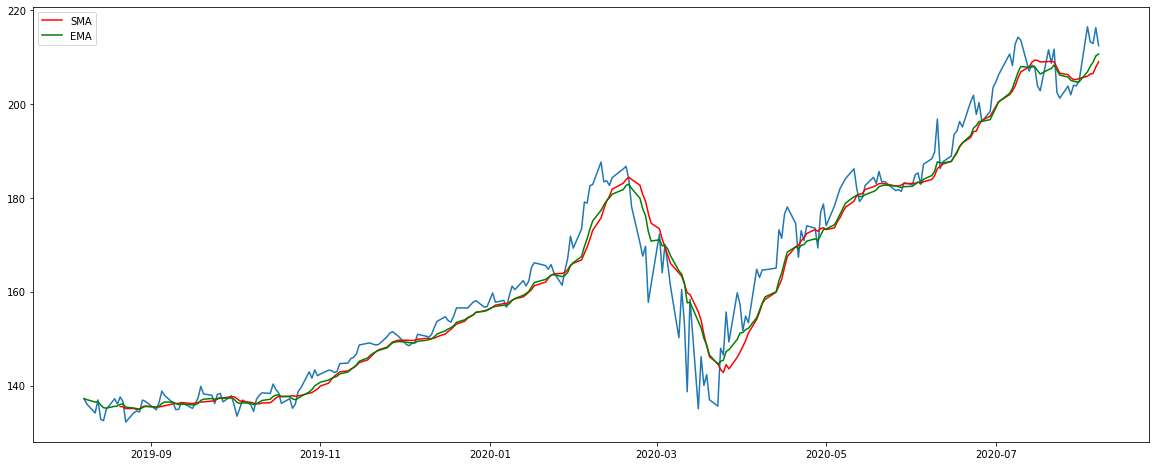

In [5]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(hist.index, hist["Close"])
ax.plot(hist.index, hist["SMA"], color="red", label="SMA")
ax.plot(hist.index, hist["EMA"], color="green", label="EMA")
ax.legend()
plt.show()

<AxesSubplot:>

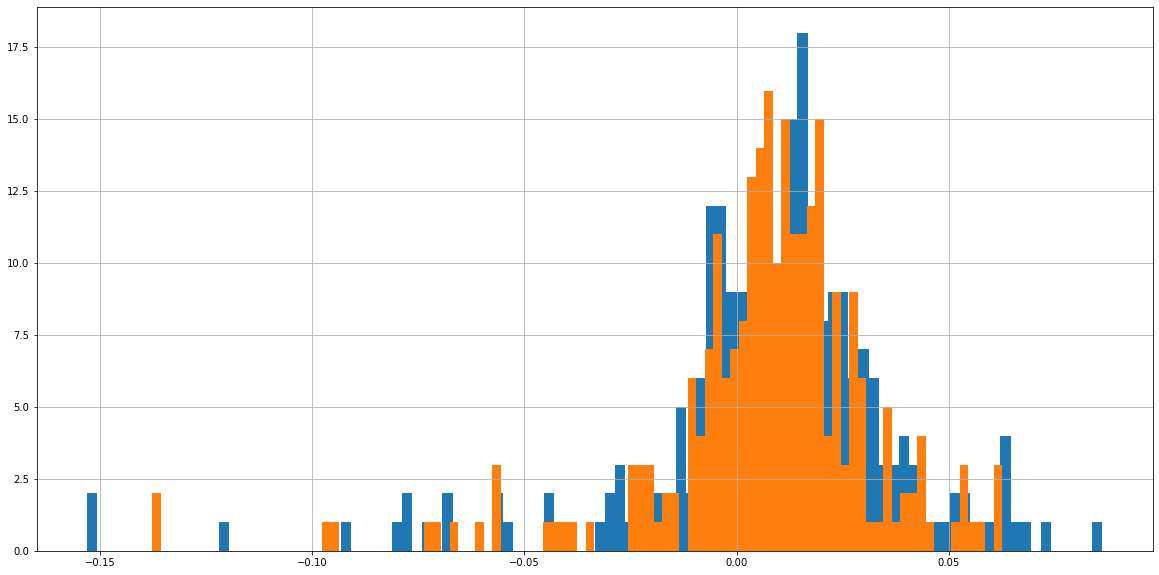

In [6]:
hist["SMA_diff"] = (hist["Close"] - hist["SMA"]) / hist["Close"]
hist["EMA_diff"] = (hist["Close"] - hist["EMA"]) / hist["Close"]
hist["SMA_diff"].hist(bins=100, figsize=(20,10))
hist["EMA_diff"].hist(bins=100, figsize=(20,10))

# SMA & EMA buy/sell indicators

In [7]:
def get_sma_ema_indicators(stock_code, sma_span, ema_span, visualising=False):
    stock = yf.Ticker(stock_code)
    hist = stock.history(period="max")
    hist["SMA"] = hist["Close"].rolling(sma_span).sum()/sma_span
    hist["EMA"] = hist["Close"].ewm(span=ema_span, min_periods=0, adjust=False, ignore_na=False).mean()
    hist["SMA_diff"] = (hist["Close"] - hist["SMA"]) / hist["Close"]
    hist["EMA_diff"] = (hist["Close"] - hist["EMA"]) / hist["Close"]
    
    current_sma_diff = hist.iloc[-1]["SMA_diff"]
    current_ema_diff = hist.iloc[-1]["EMA_diff"]
    
    sma_below, sma_above = np.sum(hist["SMA_diff"] <= current_sma_diff), np.sum(hist["SMA_diff"] > current_sma_diff)
    ema_below, ema_above = np.sum(hist["EMA_diff"] <= current_ema_diff), np.sum(hist["EMA_diff"] > current_ema_diff)
    
    if visualising:
        print("Current SMA difference for", stock_code, "is:", current_sma_diff, "%.")
        print(sma_below, "or", sma_below / (sma_below + sma_above), "% are below this value and", sma_above, "or", sma_above / (sma_below + sma_above), "% are above.")
        print("")
        print("Current EMA difference for", stock_code, "is:", current_ema_diff, "%.")
        print(ema_below, "or", ema_below / (ema_below + ema_above), "% are below this value and", ema_above, "or", ema_above / (ema_below + ema_above), "% are above.")
    
        # Visualising
        hist = stock.history(period="1y")
        hist["SMA"] = hist["Close"].rolling(sma_span).sum()/sma_span
        hist["EMA"] = hist["Close"].ewm(span=ema_span, min_periods=0, adjust=False, ignore_na=False).mean()
        fig, ax = plt.subplots(figsize=(20,8))
        ax.plot(hist.index, hist["Close"])
        ax.plot(hist.index, hist["SMA"], color="red", label="SMA")
        ax.plot(hist.index, hist["EMA"], color="green", label="EMA")
        ax.legend()
        plt.show()
    
    sma_indicator_num = sma_below / (sma_below + sma_above)
    ema_indicator_num = ema_below / (ema_below + ema_above)
    
    if sma_indicator_num <= 0.1:
        sma_indicator = "Strong Buy"
    elif sma_indicator_num <= 0.2:
        sma_indicator = "Buy"
    elif sma_indicator_num >= 0.9:
        sma_indicator = "Strong Sell"
    elif sma_indicator_num >= 0.8:
        sma_indicator = "Sell"
    else:
        sma_indicator = "Hold"
        
    if ema_indicator_num <= 0.1:
        ema_indicator = "Strong Buy"
    elif ema_indicator_num <= 0.2:
        ema_indicator = "Buy"
    elif ema_indicator_num >= 0.9:
        ema_indicator = "Strong Sell"
    elif ema_indicator_num >= 0.8:
        ema_indicator = "Sell"
    else:
        ema_indicator = "Hold"
    
    return sma_indicator_num, ema_indicator_num, sma_indicator, ema_indicator

def color_map(val):
    try:
        if val <= 0.2:
            color = "green"
        elif val >= 0.9:
            color =  "red"
        else: 
            color = "yellow"
    except:
        color = "white"
    return "background-color: %s" % color

Current SMA difference for MSFT is: 0.016170933734940728 %.
5906 or 0.6816712834718375 % are below this value and 2758 or 0.3183287165281625 % are above.

Current EMA difference for MSFT is: 0.00837477013221665 %.
5022 or 0.5790383950190245 % are below this value and 3651 or 0.42096160498097546 % are above.


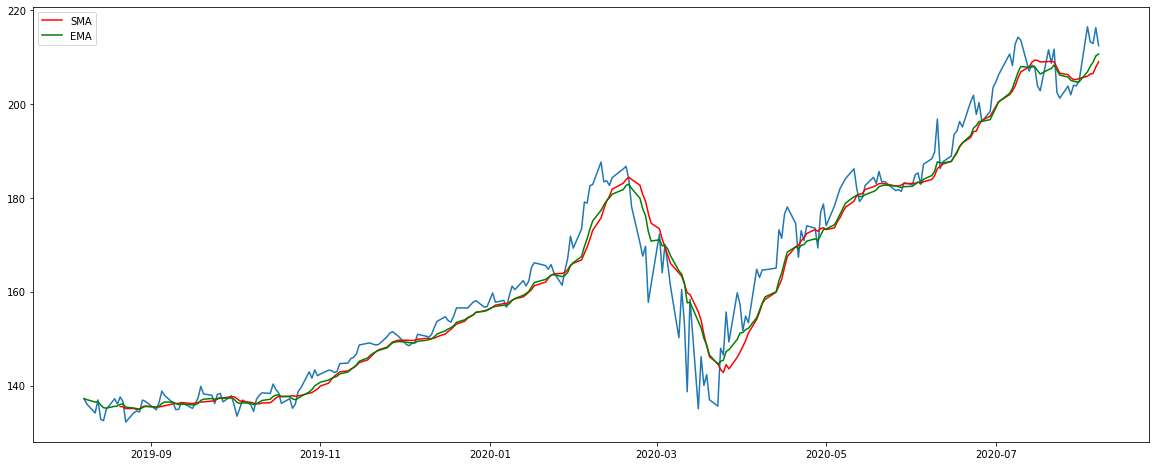

,%,Indicator
SMA,0.681671,Hold
EMA,0.579038,Hold


In [11]:
sma_below, ema_below, sma_indicator, ema_indicator = get_sma_ema_indicators("MSFT", 10, 10, visualising=True)
pd.DataFrame({"%":[sma_below, ema_below], "Indicator":[sma_indicator, ema_indicator]}, index=["SMA", "EMA"]).style.applymap(color_map)

In [9]:
def get_indicator_overview(stock_code):
    df = pd.DataFrame({"%":[], "Indicator":[]})
    for i in range(5, 31, 5):
        sma_below, ema_below, sma_indicator, ema_indicator = get_sma_ema_indicators(stock_code, i, i)
        index_names = ["SMA-{}days".format(str(i)), "EMA-{}days".format(str(i))]
        df = df.append(pd.DataFrame({"%":[sma_below, ema_below], "Indicator":[sma_indicator, ema_indicator]}, index=index_names))
        
    return df.style.applymap(color_map)

# SMA & EMA analysis

In [10]:
STOCK = "TSLA"
get_indicator_overview(STOCK)

,%,Indicator
SMA-5days,0.223839,Hold
EMA-5days,0.230558,Hold
SMA-10days,0.283406,Hold
EMA-10days,0.269049,Hold
SMA-15days,0.226303,Hold
EMA-15days,0.335035,Hold
SMA-20days,0.240206,Hold
EMA-20days,0.442262,Hold
SMA-25days,0.308089,Hold
EMA-25days,0.555381,Hold
